In [1]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
csv_path = '/home/levan/Workspace/aicamp/pose_est/full_cropped_combined_keypoints.csv'

In [32]:
df = pd.read_csv(csv_path)
print('Total data shape:', df.shape)
df.head()

Total data shape: (3839, 205)


,image_name,classname,image_width,image_height,body_kp0_x,body_kp0_y,body_kp0_conf,body_kp1_x,body_kp1_y,body_kp1_conf,...,righthand_kp17_conf,righthand_kp18_x,righthand_kp18_y,righthand_kp18_conf,righthand_kp19_x,righthand_kp19_y,righthand_kp19_conf,righthand_kp20_x,righthand_kp20_y,righthand_kp20_conf
0,Salute_207_332.png,Salute,415,371,230.17348,114.315490,0.667645,214.08817,150.59085,0.791480,...,0.764242,37.581947,324.503230,0.793622,39.15378,328.432830,0.689169,40.725613,331.183530,0.387434
1,Salute_203_155.png,Salute,446,480,337.89365,121.382904,0.316033,287.43488,238.30900,0.669681,...,0.115584,277.852630,83.714070,0.079666,285.79733,86.362305,0.055519,293.742030,78.417595,0.024239
2,Salute_29_2074.png,Salute,310,356,0.00000,0.000000,0.000000,109.79304,182.39494,0.700209,...,0.533807,140.247530,66.710980,0.458098,131.83800,66.268370,0.295052,126.969330,67.153590,0.282552
3,Salute_14_2005.png,Salute,331,366,193.30597,98.864975,0.546601,179.46245,188.34996,0.712526,...,0.016344,210.275860,85.035310,0.015194,209.33020,87.399450,0.023483,209.330200,87.399450,0.013328
4,Salute_200_10.png,Salute,357,371,259.99146,89.706116,0.291182,246.79987,165.71474,0.691493,...,0.566209,192.352110,95.150566,0.598986,199.29472,93.299200,0.682596,205.311650,90.522160,0.389495


In [27]:
y = df['classname']
X = df.drop(['image_name','classname'], axis = 1)

In [28]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

In [79]:
rf_parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 400, 
              'min_samples_split': 10,
              'max_features': None,
#               'max_features': 'sqrt',
              'max_depth': 30,
              'max_leaf_nodes': None}
RF_model = RandomForestClassifier(**rf_parameters)

In [80]:
RF_model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
RF_predictions = RF_model.predict(test_X)
score = accuracy_score(test_y ,RF_predictions)
print(score)

0.6744791666666666


In [104]:
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

   ChairPose       0.73      0.83      0.78        23
   ChestBump       0.57      0.31      0.40        13
   ChildPose       0.71      0.71      0.71        17
     Dabbing       0.56      0.72      0.63        25
   EaglePose       0.79      0.83      0.81        23
     HandGun       0.30      0.26      0.28        23
   HandShake       0.27      0.33      0.30         9
   Handshake       1.00      0.18      0.31        11
   HighKneel       0.64      0.96      0.77        24
   HulkSmash       0.62      0.38      0.48        26
 KoreanHeart       0.77      0.88      0.82        41
 KungfuCrane       0.72      0.69      0.71        26
KungfuSalute       0.90      0.63      0.75        30
LeopardCrawl       0.77      0.91      0.83        22
      Salute       0.81      0.92      0.86        24
   Spiderman       0.53      0.67      0.59        24
 WarriorPose       0.71      0.52      0.60        23

 avg / total       0.69   

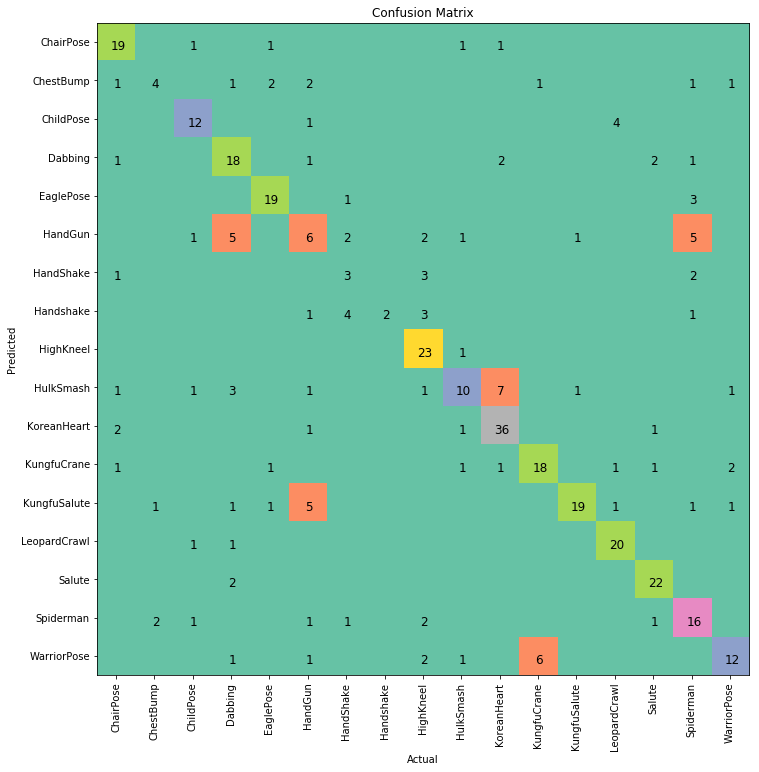

In [105]:
%matplotlib inline
from matplotlib import pyplot as plt
cm = confusion_matrix(test_y, RF_predictions)
NUM_LABELS = test_y.size
f, axes = plt.subplots(1,1, figsize = (12,12))
axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.grid(False)
axes.set_xticklabels(RF_model.classes_, rotation = 90)
axes.set_yticklabels(RF_model.classes_)
axes.set_yticks(list(range(NUM_LABELS)))
axes.set_xticks(list(range(NUM_LABELS)))
axes.set_title('Confusion Matrix')
# axes.set_title('CM for {}'.format(model_name))
plt.imshow(cm, cmap=plt.cm.Set2, interpolation='nearest')

for i, cas in enumerate(cm):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=12, color='black')
            
print(classification_report(test_y, RF_predictions))  

In [100]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear', verbose=True)  

In [101]:
svclassifier.fit(train_X, train_y)  

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [102]:
SVM_predictions = svclassifier.predict(test_X)
score = accuracy_score(test_y ,SVM_predictions)
print(score)

0.6119791666666666


              precision    recall  f1-score   support

   ChairPose       0.56      0.78      0.65        23
   ChestBump       0.25      0.08      0.12        13
   ChildPose       0.43      0.76      0.55        17
     Dabbing       0.57      0.64      0.60        25
   EaglePose       0.78      0.78      0.78        23
     HandGun       0.48      0.61      0.54        23
   HandShake       0.11      0.22      0.15         9
   Handshake       0.25      0.18      0.21        11
   HighKneel       0.68      0.62      0.65        24
   HulkSmash       0.50      0.42      0.46        26
 KoreanHeart       0.79      0.80      0.80        41
 KungfuCrane       0.82      0.54      0.65        26
KungfuSalute       0.82      0.77      0.79        30
LeopardCrawl       0.68      0.59      0.63        22
      Salute       0.77      0.71      0.74        24
   Spiderman       0.67      0.42      0.51        24
 WarriorPose       0.60      0.65      0.63        23

 avg / total       0.63   

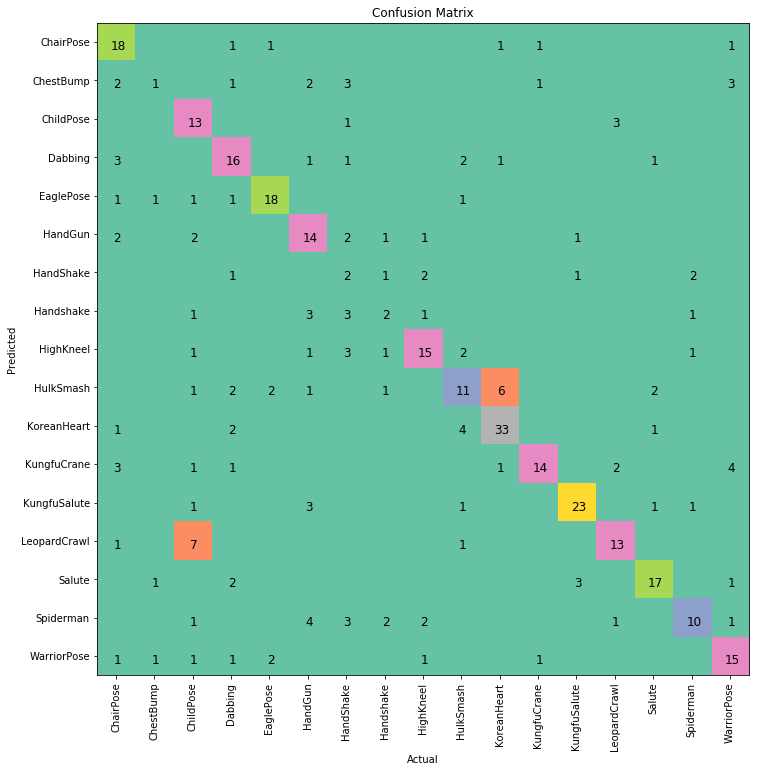

In [106]:
# %matplotlib inline
# from matplotlib import pyplot as plt
cm = confusion_matrix(test_y, SVM_predictions)
NUM_LABELS = test_y.size
f, axes = plt.subplots(1,1, figsize = (12,12))
axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.grid(False)
axes.set_xticklabels(svclassifier.classes_, rotation = 90)
axes.set_yticklabels(svclassifier.classes_)
axes.set_yticks(list(range(NUM_LABELS)))
axes.set_xticks(list(range(NUM_LABELS)))
axes.set_title('Confusion Matrix')
# axes.set_title('CM for {}'.format(model_name))
plt.imshow(cm, cmap=plt.cm.Set2, interpolation='nearest')

for i, cas in enumerate(cm):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=12, color='black')
            
print(classification_report(test_y, SVM_predictions))  

In [107]:
SVM_RBF = SVC(kernel='rbf')  
SVM_RBF.fit(train_X, train_y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
SVM_RBF_predictions = SVM_RBF.predict(test_X)
score = accuracy_score(test_y ,SVM_RBF_predictions)
print(score)

0.06510416666666667


In [ ]:
SVM_poly = SVC(kernel='poly', degree=8)  
SVM_poly.fit(train_X, train_y)  

In [ ]:
SVM_poly_predictions = SVM_poly.predict(test_X)
score = accuracy_score(test_y ,SVM_poly_predictions)
print(score)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint

#TODO DENSE LAYER
